In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
path = "C:\\Users\\Republic Of Gamers\\OneDrive\\Documents\\GitHub\\TSDN-BoyWithLuv\\Source\\Prototype\\patient_stay_cost\patient_cost_and_stay_data.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,patient_id,gender,age,insurance_type,smoking_status,e_cigarette_usage,alcohol_consumption_rate,previous_admission_count,surgery_name,surgery_type,surgery_duration,room_type,medical_equipment_count,stay_duration,ward_cost,surgery_cost,medication_cost,total_cost
0,0,1,Male,52,Private,Never,False,Occasional,2,Gallbladder Removal,Minor,74,Regular Ward,1,3,300.0,6455.90,105.00,7460.90
1,1,2,Female,18,Social Security Agency,Never,False,Occasional,1,Breast Cancer Surgery,Major,194,Regular Ward,3,8,300.0,21266.34,1609.47,25275.81
2,2,3,Female,46,Private,Never,False,Occasional,0,Gallbladder Removal,Minor,101,Regular Ward,0,4,300.0,5315.61,377.22,6892.83
3,3,4,Female,85,Social Security Agency,Never,False,NaN,2,Appendectomy,Minor,98,ICU,0,5,800.0,6098.06,613.54,10711.60
4,4,5,Male,21,Private,Never,False,Occasional,1,Hip Replacement,Major,165,VIP Ward,3,5,1000.0,12361.15,2384.62,19745.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,499996,Female,67,Social Security Agency,Current,False,NaN,0,Hernia Repair,Minor,51,ICU,1,5,800.0,3000.00,132.85,7132.85
499996,499996,499997,Female,65,Social Security Agency,Never,False,NaN,1,Liver Transplant,Major,197,Regular Ward,2,12,300.0,12420.77,1519.81,17540.58
499997,499997,499998,Female,36,Private,Never,False,Occasional,1,Breast Cancer Surgery,Major,221,Private Ward,4,13,500.0,12020.26,1466.69,19986.95
499998,499998,499999,Female,56,Social Security Agency,Former,False,NaN,2,Knee Replacement,Major,176,Regular Ward,1,11,300.0,11255.24,1774.89,16330.13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                500000 non-null  int64  
 1   patient_id                500000 non-null  int64  
 2   gender                    500000 non-null  object 
 3   age                       500000 non-null  int64  
 4   insurance_type            500000 non-null  object 
 5   smoking_status            500000 non-null  object 
 6   e_cigarette_usage         500000 non-null  bool   
 7   alcohol_consumption_rate  312032 non-null  object 
 8   previous_admission_count  500000 non-null  int64  
 9   surgery_name              500000 non-null  object 
 10  surgery_type              500000 non-null  object 
 11  surgery_duration          500000 non-null  int64  
 12  room_type                 500000 non-null  object 
 13  medical_equipment_count   500000 non-null  i

In [4]:
df.describe()

,Unnamed: 0,patient_id,age,previous_admission_count,surgery_duration,medical_equipment_count,stay_duration,ward_cost,surgery_cost,medication_cost,total_cost
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,249999.500000,250000.500000,50.162344,0.999698,132.155398,1.656316,7.386190,614.523000,11044.998064,1540.714617,17506.124281
std,144337.711635,144337.711635,17.197786,0.996054,64.389109,1.225122,4.597622,243.070567,5438.282183,942.313358,9271.173399
min,0.000000,1.000000,18.000000,0.000000,20.000000,0.000000,1.000000,300.000000,3000.000000,100.000000,3400.000000
25%,124999.750000,125000.750000,38.000000,0.000000,66.000000,1.000000,4.000000,300.000000,5320.770000,590.440000,7347.287500
50%,249999.500000,250000.500000,50.000000,1.000000,151.000000,1.000000,7.000000,800.000000,12109.315000,1668.720000,20028.635000
75%,374999.250000,375000.250000,62.000000,2.000000,186.000000,2.000000,11.000000,800.000000,15634.217500,2324.190000,25194.812500
max,499999.000000,500000.000000,90.000000,5.000000,300.000000,5.000000,28.000000,1000.000000,27642.610000,4931.090000,51033.560000


In [5]:
def print_unique(df):
    for column in df.select_dtypes(include=['object','bool']).columns:
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)

In [6]:
print_unique(df)

Column: gender
Unique Values: ['Male' 'Female']
--------------------------------------------------
Column: insurance_type
Unique Values: ['Private' 'Social Security Agency' 'Self-Pay']
--------------------------------------------------
Column: smoking_status
Unique Values: ['Never' 'Current' 'Former']
--------------------------------------------------
Column: e_cigarette_usage
Unique Values: [False  True]
--------------------------------------------------
Column: alcohol_consumption_rate
Unique Values: ['Occasional' nan 'Heavy' 'Moderate']
--------------------------------------------------
Column: surgery_name
Unique Values: ['Gallbladder Removal' 'Breast Cancer Surgery' 'Appendectomy'
 'Hip Replacement' 'Cataract Surgery' 'Hernia Repair' 'Knee Replacement'
 'Liver Transplant' 'Heart Bypass' 'Spinal Fusion']
--------------------------------------------------
Column: surgery_type
Unique Values: ['Minor' 'Major']
--------------------------------------------------
Column: room_type
Unique

In [7]:
df['alcohol_consumption_rate'] = df['alcohol_consumption_rate'].fillna("Never")

In [8]:
gender_mapping = {
    "Male":0,
    "Female":1
}

insurance_type_mapping = {
    "Private":0,
    "Social Security Agency":1,
    "Self-Pay":2
}

smoking_status_mapping = {
    "Never":0,
    "Current":1,
    "Former":2
}

alcohol_consumption_rate_mapping = {
    "Never":0,
    "Occasional":1,
    "Moderate":2,
    "Heavy":3
}

surgery_name_mapping = {
    'Gallbladder Removal':0, 
    'Breast Cancer Surgery':1,
    'Appendectomy':2,
    'Hip Replacement':3,
    'Cataract Surgery':4,
    'Hernia Repair':5, 
    'Knee Replacement':6,
    'Liver Transplant':7,
    'Heart Bypass':8, 
    'Spinal Fusion':9
}

surgery_type_mapping = {
    "Minor":0,
    "Major":1
}

room_type_mapping = {
    "Regular Ward":0,
    "Private Ward":1,
    "VIP Ward":2,
    "ICU":3
}

In [9]:
df['gender'] = df['gender'].map(gender_mapping)
df['insurance_type'] = df['insurance_type'].map(insurance_type_mapping)
df['smoking_status'] = df['smoking_status'].map(smoking_status_mapping)
df['alcohol_consumption_rate'] = df['alcohol_consumption_rate'].map(alcohol_consumption_rate_mapping)
df['surgery_name'] = df['surgery_name'].map(surgery_name_mapping)
df['surgery_type'] = df['surgery_type'].map(surgery_type_mapping)
df['room_type'] = df['room_type'].map(room_type_mapping)


In [10]:
e_cigarette_usage_mapping = {False: 0, True: 1}
df['e_cigarette_usage'] = df['e_cigarette_usage'].map(e_cigarette_usage_mapping)

In [11]:
print(df['stay_duration'].describe())

count    500000.000000
mean          7.386190
std           4.597622
min           1.000000
25%           4.000000
50%           7.000000
75%          11.000000
max          28.000000
Name: stay_duration, dtype: float64


In [12]:
'''# Define the bins (for example, 4 equal-width bins)
bins = [0, 5, 10, 20, df['stay_duration'].max()]
labels = ['0-5', '6-10', '11-20', '21+']

# Convert 'day_stayed' into categories
df['stay_duration_class'] = pd.cut(df['stay_duration'], bins=bins, labels=labels, right=False)

# Check the new column
print(df['stay_duration_class'].value_counts())'''

"# Define the bins (for example, 4 equal-width bins)\nbins = [0, 5, 10, 20, df['stay_duration'].max()]\nlabels = ['0-5', '6-10', '11-20', '21+']\n\n# Convert 'day_stayed' into categories\ndf['stay_duration_class'] = pd.cut(df['stay_duration'], bins=bins, labels=labels, right=False)\n\n# Check the new column\nprint(df['stay_duration_class'].value_counts())"

In [13]:
df_sampled = df.sample(n=15000, random_state=42)

# Check the shape of the sampled DataFrame
print(df_sampled.shape)

(15000, 19)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                500000 non-null  int64  
 1   patient_id                500000 non-null  int64  
 2   gender                    500000 non-null  int64  
 3   age                       500000 non-null  int64  
 4   insurance_type            500000 non-null  int64  
 5   smoking_status            500000 non-null  int64  
 6   e_cigarette_usage         500000 non-null  int64  
 7   alcohol_consumption_rate  500000 non-null  int64  
 8   previous_admission_count  500000 non-null  int64  
 9   surgery_name              500000 non-null  int64  
 10  surgery_type              500000 non-null  int64  
 11  surgery_duration          500000 non-null  int64  
 12  room_type                 500000 non-null  int64  
 13  medical_equipment_count   500000 non-null  i

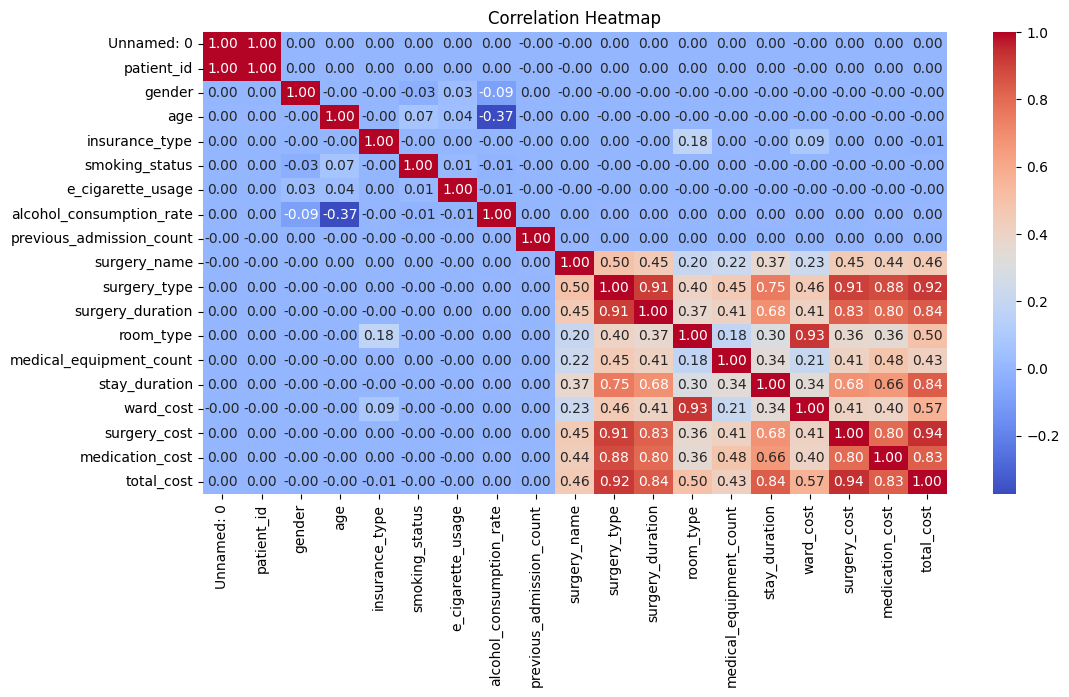

In [15]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()

In [16]:
stayDurationFeatures = df_sampled[["insurance_type", "surgery_name", "surgery_duration","room_type", "medical_equipment_count", "ward_cost", "surgery_cost","medication_cost","total_cost"]]
totalCostFeatures = df_sampled[["surgery_name","surgery_type","surgery_duration","room_type","medical_equipment_count","stay_duration","ward_cost","surgery_cost","medication_cost"]]

In [25]:
print(X_stayDuration.shape)

(15000, 9)


In [17]:
X_stayDuration = stayDurationFeatures
y_stayDuration = df_sampled["stay_duration"]

X_totalCost = totalCostFeatures
y_totalCost = df_sampled["total_cost"]

X_train_stayDuration, X_test_stayDuration, y_train_stayDuration, y_test_stayDuration = train_test_split(
    X_stayDuration, y_stayDuration, test_size=0.3, random_state=42)

# Splitting the totalCost features and target
X_train_totalCost, X_test_totalCost, y_train_totalCost, y_test_totalCost = train_test_split(
    X_totalCost, y_totalCost, test_size=0.3, random_state=42)


In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit to the data
grid_search.fit(X_train_stayDuration, y_train_stayDuration)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [19]:
# Extract the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize the RandomForestRegressor with the best parameters
best_rf = RandomForestRegressor(**best_params)

# Fit the model to the full training data
best_rf.fit(X_train_stayDuration, y_train_stayDuration)

# Make predictions on the test set or future data
y_pred = best_rf.predict(X_test_stayDuration)

# Display predictions
print(y_pred)

[ 1.32333333 11.59666667 12.56333333 ... 10.33333333  5.06666667
 10.31333333]


In [20]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_stayDuration, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test_stayDuration, y_pred)

# Calculate R-squared
r2 = r2_score(y_test_stayDuration, y_pred)

# Display the metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 0.5840589518698085
Mean Absolute Error (MAE): 0.34152592592592595
R-squared (R²): 0.9841209111413726


In [21]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
xgb_model = XGBRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit to the data
grid_search.fit(X_train_stayDuration, y_train_stayDuration)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [22]:
# Extract the best parameters from the grid search
best_params_xgb = grid_search.best_params_

# Initialize the RandomForestRegressor with the best parameters
best_xgb= RandomForestRegressor(**best_params_xgb)

# Fit the model to the full training data
best_xgb.fit(X_train_stayDuration, y_train_stayDuration)

# Make predictions on the test set or future data
y_pred_xgb = best_xgb.predict(X_test_stayDuration)

# Display predictions
print(y_pred_xgb)

[ 1.34       11.55333333 12.47       ... 10.42333333  5.03333333
 10.26666667]


In [23]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_stayDuration, y_pred_xgb))

# Calculate MAE
mae = mean_absolute_error(y_test_stayDuration, y_pred_xgb)

# Calculate R-squared
r2 = r2_score(y_test_stayDuration, y_pred_xgb)

# Display the metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 0.582814914609568
Mean Absolute Error (MAE): 0.3427081481481481
R-squared (R²): 0.9841884835673284


In [24]:
joblib.dump(best_xgb, 'xgb_stayDuration.pkl')

['xgb_stayDuration.pkl']